# Perkenalan

```
=================================================
Milestone 2

Nama  : Rais Yufli Xavierullah

Batch : HCK-007

=================================================

```

- Link Hugging Face : https://huggingface.co/spaces/RYX12/Predict_House
- Link Dataset : https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

Setiap kolom dari dataset ini memiliki keterangan sebagai berikut:

- Price: Harga rumah.
- Area: Luas total rumah dalam kaki persegi.
- Bedrooms: Jumlah kamar tidur dalam rumah.
- Bathrooms: Jumlah kamar mandi dalam rumah.
- Stories: Jumlah lantai dalam rumah.
- Mainroad: Apakah rumah terhubung ke jalan utama (Ya/Tidak).
- Guestroom: Apakah rumah memiliki kamar tamu (Ya/Tidak).
- Basement: Apakah rumah memiliki basement (Ya/Tidak).
- Hot water heating: Apakah rumah memiliki sistem pemanas air panas (Ya/Tidak).
- Airconditioning: Apakah rumah memiliki AC (Ya/Tidak).
- Parking: Jumlah tempat parkir yang tersedia di dalam rumah.
- Prefarea: Apakah rumah berlokasi di area yang diinginkan (Ya/Tidak).
- Furnishing status: Status perabotan dalam rumah (Perabotan Lengkap, Perabotan Sebagian, Tanpa Perabotan).


Object : 
1. Menentukan model yang terbaik untuk memprediksi harga rumah
2. Mengetahui faktor apa saja yang mempengaruhi pengaruh tinggi untuk memprediksi harga rumah

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau


# preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
# model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [2]:
# Membaca file csv yang sudah kita download 
df = pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Exploratory Data Analysis (EDA)

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Mengecek data duplicat
df[df.duplicated()].shape

(0, 13)

In [6]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


Dari gambaran umum :
- Tidak terdapat missing value pada data ini
- Tidak terdapat data duplikat pada data ini
- dari data yang memilki numerikal terlihat data umumnya berbeda jauh antara nilai mean dan nilai median bisa dikatakan tidak berdistribusi normal
- dari data yang kategori saya anggap sudah cukup karena data kategori tidak terlalu besar

In [8]:
num_col = ['price','area']
cat_col_num = ['bedrooms', 'bathrooms', 'stories','parking']
cat_col_ohe = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

Histogram of price


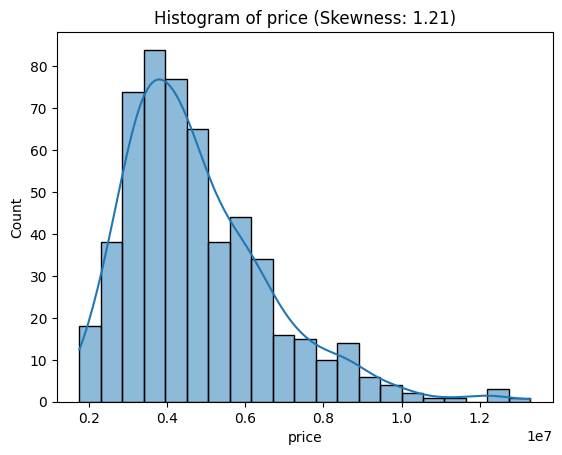

Histogram of area


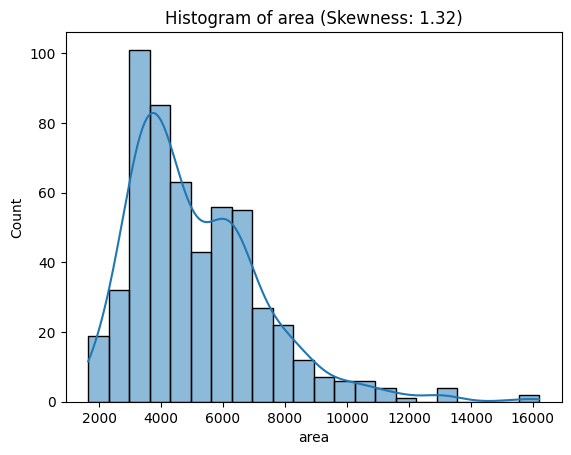

In [9]:
for i in num_col:
    skewness = df[i].skew()
    print(f'Histogram of {i}')
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram of {i} (Skewness: {skewness:.2f})')
    plt.show()

Dapat dilihat dari data numerikal yaitu kolom `area` dan `price` mempunyai skewness di atas 1 yang bisa dikatakan bahwa data ini tidak berdistribusi normal

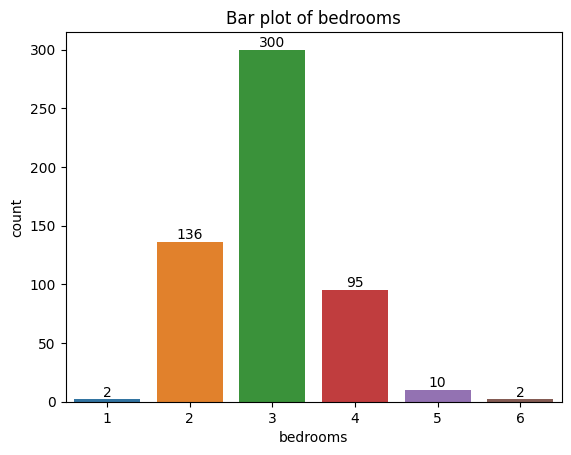

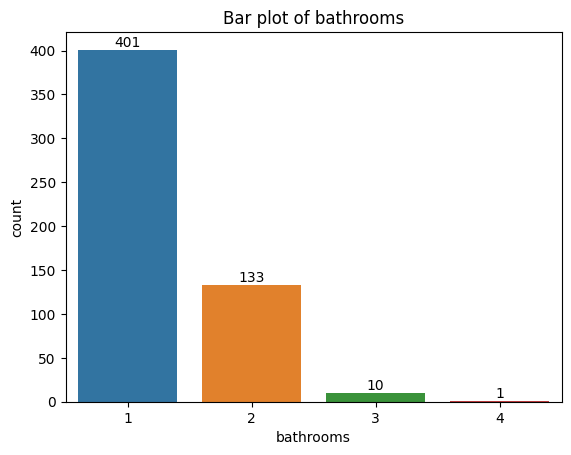

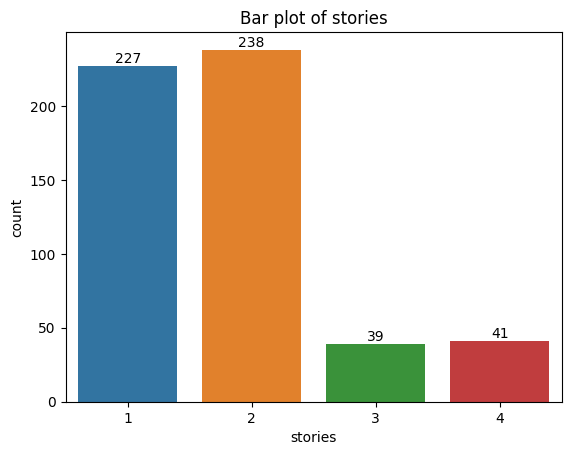

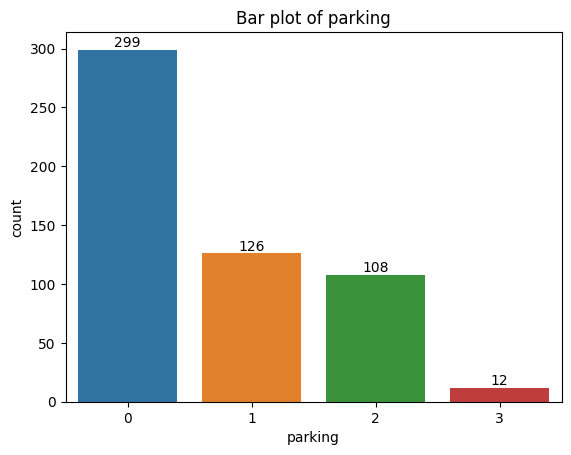

In [10]:
for i in cat_col_num:
    barplots = sns.countplot(data=df,x=i)
    for ix in barplots.containers:
        barplots.bar_label(ix)
    plt.title(f'Bar plot of {i}')
    plt.show()

- Dapat dilihat dari gambar bahwa mayoritas rumah mempunyai 3 kamar tidur pada rumahnya dengan jumlah 300 rumah
- Dapat dilihat dari gambar bahwa mayoritas rumah mempunyai 1 kamar mandi pada rumahnya dengan jumlah 401 rumah
- Dapat dilihat dari gambar bahwa mayoritas rumah mempunyai 2 lantai pada rumahnya dengan jumlah 238 rumah
- Dapat dilihat dari gambar bahwa mayoritas rumah tidak mempunyai parkir pada rumahnya dengan jumlah 299 rumah

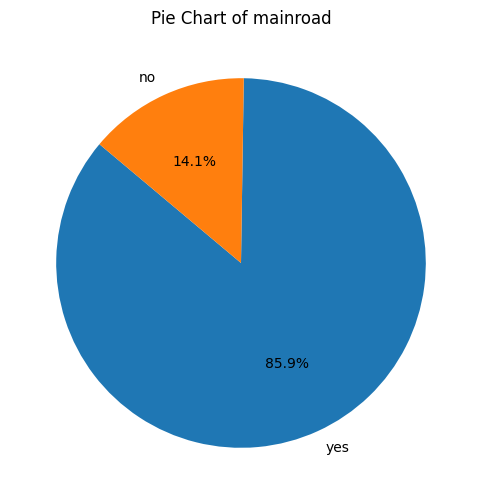

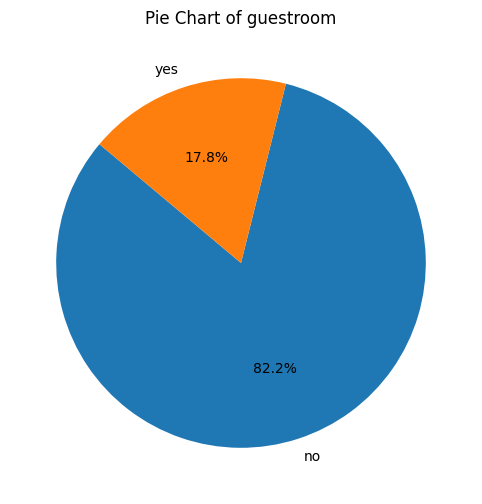

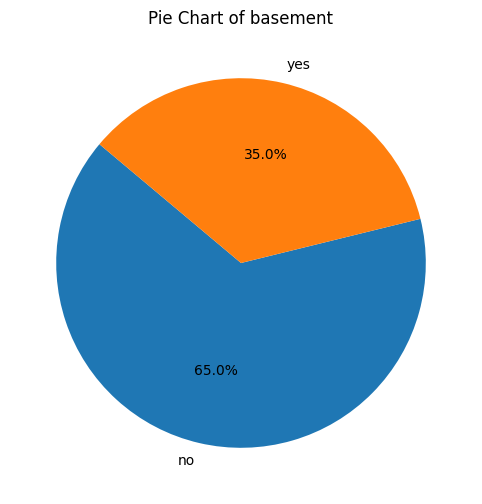

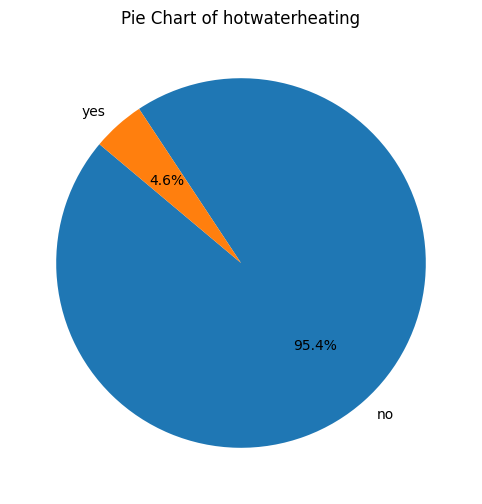

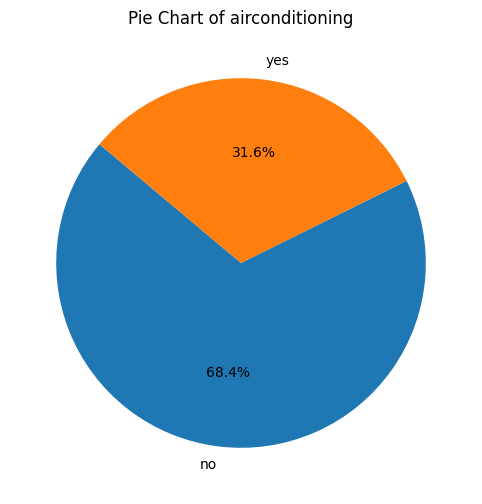

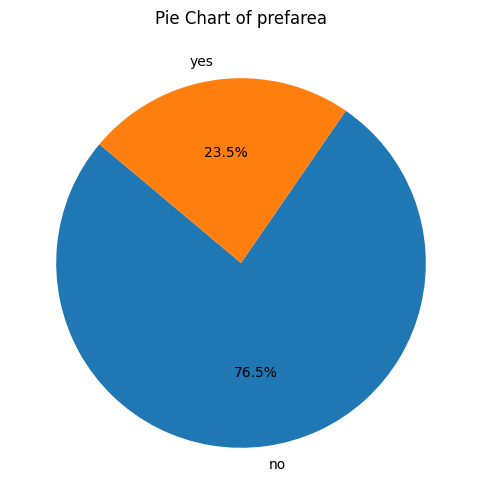

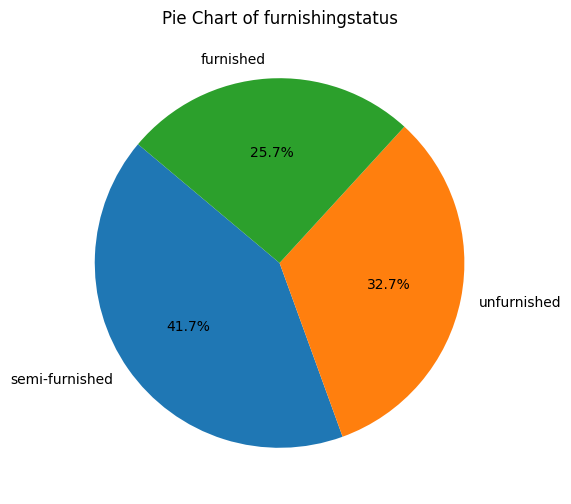

In [11]:
for i in cat_col_ohe:
    category_counts = df[i].value_counts()
    # Membuat pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {i}')
    
    plt.show()

- Dapat dilihat dari gambar bahwa mayoritas rumah terhubung dengan jalan utama dengan persentase 85.9%
- Dapat dilihat dari gambar bahwa mayoritas rumah tidak memiliki kamar tamu dengan persentase 82.2%
- Dapat dilihat dari gambar bahwa mayoritas rumah tidak memiliki basement dengan persentase 65%
- Dapat dilihat dari gambar bahwa mayoritas rumah tidak memiliki sistem pemanas air dengan persentase 95.4%
- Dapat dilihat dari gambar bahwa mayoritas rumah tidak memiliki AC dengan persentase 68.4%
- Dapat dilihat dari gambar bahwa mayoritas rumah berlokasi di area yang tidak diinginkan dengan persentase 76.5%
- Dapat dilihat dari gambar bahwa mayoritas rumah memiliki sebagian perabotan saja dengan persentase 41.7%

# Feature Engineering

In [12]:
# Memisahkan target dengan feature

X = df.drop('price',axis=1)
y = df['price']

In [13]:
# Membagi data menjadi data train dan data test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 99)

## Data for Feature Selection

In [14]:
# Menggabungkan data dari x train dan y train agar bisa dilakukan seleksi fitur
df_train = pd.concat([X_train, y_train], axis=1)


df_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
395,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished,3500000
51,6325,3,1,4,yes,no,no,no,yes,1,no,unfurnished,7420000
208,2970,3,1,3,yes,no,no,no,no,0,no,semi-furnished,4900000
415,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished,3395000
448,4095,2,1,1,yes,no,no,no,no,2,no,semi-furnished,3150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2800,3,2,2,no,no,yes,no,yes,1,no,semi-furnished,4956000
68,6000,3,1,1,yes,no,no,no,yes,1,no,furnished,6860000
168,4260,4,1,2,yes,no,yes,no,yes,0,no,furnished,5250000
185,3000,3,1,2,yes,no,yes,no,no,0,no,unfurnished,5110000


In [15]:
# Merubah kategori kolom dan numerikal kolom
cat_col_ord = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
cat_col_num = ['bedrooms', 'bathrooms', 'stories','parking']
num_col_split = ['area']


print('numerical column: ', num_col_split)
print('categorical column: ', cat_col_ord)
print('categorical column: ', cat_col_num)

numerical column:  ['area']
categorical column:  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
categorical column:  ['bedrooms', 'bathrooms', 'stories', 'parking']


In [16]:
# outlier detection using IQR 
Q3 = df_train['area'].quantile(.75)
Q1 = df_train['area'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['area'] > upper) | (df_train['area'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_train.shape[0] * 100, '%')

count of outlier:  8
percentage of outlier:  1.834862385321101 %


In [17]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['area'])

df_train_cap = wins.fit_transform(df_train)


Dari data yang saya gunakan terdapat outlier sebesar 1.83% yaitu 8 data dikarenakan skewnessnya melebihi satu maka saya menggunakan metode iqr untuk merubah outlier menjadi data yang paling dekat dengan tidak outlier

## Scaling

In [18]:
# Menyamakan satuan dengan metode scalling minmax
scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(df_train_cap[num_col_split])
scaled_df = pd.DataFrame(num_scaled, columns=["area"])

Disini dilakukan scaling data yaitu merubah data yang numerikal menjadi satuan yang sama dikarenakan data numerikal mempunyai distribusi tidak normal maka saya menggunakan minmaxscaler

## Ordinal Encoding

In [19]:
for col in cat_col_ord:
    unique_values = df_train[col].unique()
    print(f'Kolom {col}: {unique_values}')

Kolom mainroad: ['yes' 'no']
Kolom guestroom: ['no' 'yes']
Kolom basement: ['no' 'yes']
Kolom hotwaterheating: ['no' 'yes']
Kolom airconditioning: ['no' 'yes']
Kolom prefarea: ['no' 'yes']
Kolom furnishingstatus: ['unfurnished' 'semi-furnished' 'furnished']


In [20]:
mainroad_cat = ['no', 'yes']
guestroom_cat = ['no', 'yes']
basement_cat = ['no', 'yes']
hotwaterheating_cat = ['no', 'yes']
airconditioning_cat = ['no', 'yes']
prefarea_cat = ['no', 'yes']
furnishingstatus_cat = ['unfurnished', 'semi-furnished' ,'furnished']

ord_enc = OrdinalEncoder(categories=[mainroad_cat, guestroom_cat, basement_cat, hotwaterheating_cat, airconditioning_cat, prefarea_cat, furnishingstatus_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_train[cat_col_ord]))
cat_ord.columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']


Disini dilakukan ordinal encoder yaitu merubah data yang kategori menjadi numerikal dengan catatan bahwa kategori ini bertingkat, saya mempunyai personal judgment semua data kategori di data yang saya gunakan mempunyai rank seperti contoh bila rumah mempunyai ac maka harganya akan lebih mahal maka terdapat tingkatan pada kategori tersebut

## Feature Selection

In [21]:
# Reset indeks kedua DataFrame
scaled_df.reset_index(drop=True, inplace=True)
cat_ord.reset_index(drop=True, inplace=True)

df_eda_cleaned = pd.concat([scaled_df, cat_ord,df_train[cat_col_num].reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
df_eda_cleaned


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,bedrooms,bathrooms,stories,parking,price
0,0.222730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1,2,1,3500000
1,0.533981,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1,4,1,7420000
2,0.150771,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,3,0,4900000
3,0.358081,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3,1,2,1,3395000
4,0.279269,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,1,2,3150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.131354,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3,2,2,1,4956000
432,0.496859,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3,1,1,1,6860000
433,0.298115,1.0,0.0,1.0,0.0,1.0,0.0,2.0,4,1,2,0,5250000
434,0.154198,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1,2,0,5110000


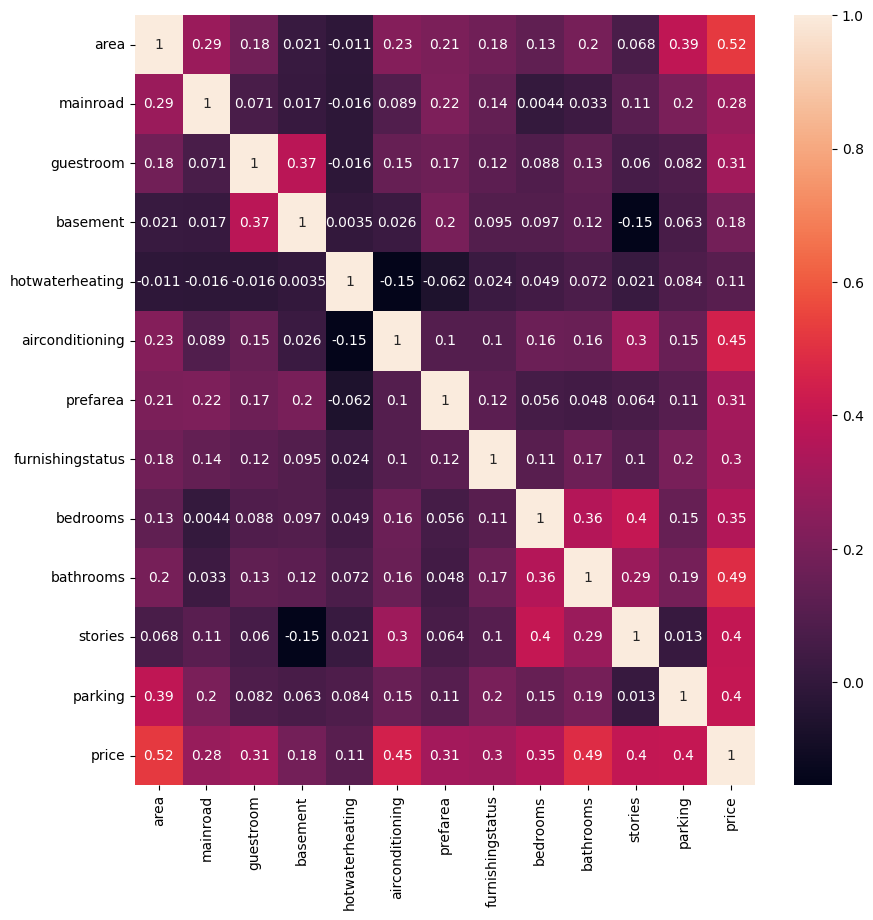

In [22]:
fig,ax = plt.subplots(figsize=[10,10])

corr = df_eda_cleaned.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [23]:
df_eda_cleaned[['area','guestroom','airconditioning','prefarea','furnishingstatus','bedrooms','bathrooms','stories','parking']]

,area,guestroom,airconditioning,prefarea,furnishingstatus,bedrooms,bathrooms,stories,parking
0,0.222730,0.0,0.0,0.0,0.0,6,1,2,1
1,0.533981,0.0,1.0,0.0,0.0,3,1,4,1
2,0.150771,0.0,0.0,0.0,1.0,3,1,3,0
3,0.358081,1.0,1.0,0.0,2.0,3,1,2,1
4,0.279269,0.0,0.0,0.0,1.0,2,1,1,2
...,...,...,...,...,...,...,...,...,...
431,0.131354,0.0,1.0,0.0,1.0,3,2,2,1
432,0.496859,0.0,1.0,0.0,2.0,3,1,1,1
433,0.298115,0.0,1.0,0.0,2.0,4,1,2,0
434,0.154198,0.0,0.0,0.0,0.0,3,1,2,0


Dari fitur seleksi saya mempunyai batasan bila data lebih dari 0.3 maka saya menganggap bahwa mempunyai korelasi terhadap harga, dari perhitungan yang saya coba mendapatkan fitur berjumlah 9 yaitu kolom `area`, `guestroom`, `airconditioning`, `prefarea`, `furnishingstatus`, `bedrooms`, `bathrooms`, `stories`, `parking`

## Preprocessing

In [24]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['area']])
num_tr_array = np.array(num_tr)

num_tr_array

array([[0.15189282],
       [0.36415329],
       [0.10281975],
       [0.24419692],
       [0.19045023],
       [0.34195358],
       [0.29210157],
       [0.57251908],
       [0.44399439],
       [0.2843122 ],
       [0.29989095],
       [0.18616607],
       [0.19239757],
       [0.29599626],
       [1.        ],
       [0.33104845],
       [0.03855741],
       [0.45567845],
       [0.43231033],
       [0.33883783],
       [0.41127902],
       [0.16435582],
       [0.68935971],
       [0.39725814],
       [0.49073064],
       [0.26250195],
       [0.22978657],
       [0.16591369],
       [0.16747157],
       [0.41673158],
       [0.04089422],
       [0.3466272 ],
       [0.19239757],
       [0.16357688],
       [0.19862907],
       [0.14020876],
       [0.25782832],
       [0.14254557],
       [0.14566132],
       [0.58544945],
       [0.14254557],
       [0.39492133],
       [0.33883783],
       [0.19551332],
       [0.02336813],
       [0.11450382],
       [0.40598224],
       [0.366

In [25]:
cat_pipeline_num = Pipeline([    
            ('passthrough', None)
])

cat_num_tr = cat_pipeline_num.fit_transform(X_train[['bedrooms','bathrooms','stories','parking']])
cat_num_tr_array = np.array(cat_num_tr)

cat_num_tr_array

array([[6, 1, 2, 1],
       [3, 1, 4, 1],
       [3, 1, 3, 0],
       ...,
       [4, 1, 2, 0],
       [3, 1, 2, 0],
       [3, 2, 4, 2]], dtype=int64)

In [26]:
guestroom_cat = ['no', 'yes']
airconditioning_cat = ['no', 'yes']
prefarea_cat = ['no', 'yes']
furnishingstatus_cat = ['unfurnished', 'semi-furnished' ,'furnished']
ordinal_encoder = OrdinalEncoder(categories=[guestroom_cat,airconditioning_cat,prefarea_cat,furnishingstatus_cat])

cat_pipeline_ord = Pipeline([    
            ('ordinal_encoder', ordinal_encoder)
])

cat_ord_tr = cat_pipeline_ord.fit_transform(X_train[['guestroom','airconditioning','prefarea','furnishingstatus']])
cat_ord_tr_array = np.array(cat_ord_tr)

cat_ord_tr_array

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 2.],
       [0., 0., 0., 0.],
       [0., 1., 0., 2.]])

In [27]:
preprocessor = ColumnTransformer([
        ("num", num_pipeline, ['area']),
        ("cat_num", cat_pipeline_num, ['bathrooms','stories','parking']),
        ("cat_ord", cat_pipeline_ord, ['guestroom','airconditioning','prefarea','furnishingstatus'])
    ])

train_tr = preprocessor.fit_transform(X_train)
train_tr

array([[0.15189282, 1.        , 2.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36415329, 1.        , 4.        , ..., 1.        , 0.        ,
        0.        ],
       [0.10281975, 1.        , 3.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.2033027 , 1.        , 2.        , ..., 1.        , 0.        ,
        2.        ],
       [0.10515657, 1.        , 2.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41673158, 2.        , 4.        , ..., 1.        , 0.        ,
        2.        ]])

In [28]:
test_tr = preprocessor.transform(X_test)
test_tr

array([[0.24848107, 1.        , 2.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.56278236, 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.20797632, 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.53980371, 3.        , 4.        , 2.        , 0.        ,
        1.        , 1.        , 1.        ],
       [0.11956691, 1.        , 1.        , 2.        , 0.        ,
        0.        , 0.        , 2.        ],
       [0.22978657, 2.        , 1.        , 2.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.31702757, 1.        , 2.        , 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.70493846, 1.        , 2.        , 0.        , 1.        ,
        0.        , 0.        , 1.        ],
       [0.47904658, 1.        , 1.        , 2.        , 0.        ,
        1.        , 1.      

Saya akan melakukan pembuatan pipeline sesuai dengan tipe-tipe data untuk data numerikal saya menggunakan handling outlier dengan capping menggunakan winsorizer dan scaling menggunakan minmaxscaler, untuk kategori yang sudah bertipe numerik saya tidak melakukan apapun karena data sudah numerik dan bertingkat, untuk kategori yang bertipe kategori bertipe object maka saya rubah menjadi numerikal dengan menggunakan metode ordinal

# Model

Pada tahap kali ini saya akan menggunakan 6 model:
- KNN Regressor
- SVR
- DecisionTree Regressor
- RandomForest Regressor
- AdaBoost Regressor
- Linear Regression

In [29]:
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor(random_state = 0)
rfr = RandomForestRegressor(random_state = 0)
abr = AdaBoostRegressor(random_state = 0)
lr = LinearRegression()

Disini saya melakukan cross validation yang mana saya mencoba mendapatkan nilai eror yang paling sedikit dan nilai prediksi yang paling tinggi pada data train yang dibagi menjadi 10 bagian 

In [30]:
def calculate_metrics(model, X, y, cv):
    # Metrik yang ingin dihitung
    scoring = {
        'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
        'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
        'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
        'r2': make_scorer(r2_score),
        'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    }

    # Melakukan cross-validation
    results = cross_validate(model, X, y, cv=cv, scoring=scoring)

    # Membuat DataFrame untuk menyimpan hasil
    metrics_df = pd.DataFrame({
        'Metric': list(scoring.keys()),
        'Mean': [-results['test_' + metric].mean() for metric in scoring.keys()],
        'Std': [results['test_' + metric].std() for metric in scoring.keys()]
    })

    return metrics_df

In [31]:
# pipeline knn
pipeline_knn = Pipeline([ 
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())  
])

metrics_df_knn = calculate_metrics(pipeline_knn, X_train, y_train, cv=10)
print(metrics_df_knn)


                               Metric          Mean           Std
0             neg_mean_absolute_error  8.667686e+05  1.264730e+05
1              neg_mean_squared_error  1.479149e+12  3.904425e+11
2         neg_root_mean_squared_error  1.205161e+06  1.635125e+05
3                                  r2 -5.372243e-01  1.147324e-01
4  neg_mean_absolute_percentage_error  1.873718e-01  3.914511e-02


In [33]:
pipeline_svr = Pipeline([ 
    ('preprocessor', preprocessor),
    ('svr', SVR())  
])

# Model SVR
metrics_df_svr = calculate_metrics(pipeline_svr, X_train, y_train, cv=10)
print(metrics_df_svr)

                               Metric          Mean           Std
0             neg_mean_absolute_error  1.368480e+06  1.612788e+05
1              neg_mean_squared_error  3.547264e+12  9.106720e+11
2         neg_root_mean_squared_error  1.867614e+06  2.434776e+05
3                                  r2  7.975382e-02  5.467827e-02
4  neg_mean_absolute_percentage_error  2.871121e-01  4.401344e-02


In [34]:
pipeline_dtr = Pipeline([ 
    ('preprocessor', preprocessor),
    ('dtr', DecisionTreeRegressor(random_state=0))  
])

# Model Decision Treen
metrics_df_dtr = calculate_metrics(pipeline_dtr, X_train, y_train, cv=10)
print(metrics_df_dtr)

                               Metric          Mean           Std
0             neg_mean_absolute_error  1.110246e+06  1.081807e+05
1              neg_mean_squared_error  2.280388e+12  4.275730e+11
2         neg_root_mean_squared_error  1.503236e+06  1.437722e+05
3                                  r2 -2.747728e-01  1.755451e-01
4  neg_mean_absolute_percentage_error  2.393640e-01  2.494886e-02


In [35]:
pipeline_rfr = Pipeline([ 
    ('preprocessor', preprocessor),
    ('rfr', RandomForestRegressor(random_state=0))  # Model KNN
])


# Model Random Forest
metrics_df_rfr = calculate_metrics(pipeline_rfr, X_train, y_train, cv=10)
print(metrics_df_rfr)

                               Metric          Mean           Std
0             neg_mean_absolute_error  8.431560e+05  1.141139e+05
1              neg_mean_squared_error  1.343190e+12  3.683707e+11
2         neg_root_mean_squared_error  1.147885e+06  1.598421e+05
3                                  r2 -5.826304e-01  9.614282e-02
4  neg_mean_absolute_percentage_error  1.854385e-01  3.217582e-02


In [36]:
pipeline_abr = Pipeline([
    ('preprocessor', preprocessor),
    ('abr', AdaBoostRegressor(random_state=0))  
])

# Model Adaboost
metrics_df_abr = calculate_metrics(pipeline_abr, X_train, y_train, cv=10)
print(metrics_df_abr)

                               Metric          Mean           Std
0             neg_mean_absolute_error  9.503492e+05  1.207378e+05
1              neg_mean_squared_error  1.563575e+12  4.133446e+11
2         neg_root_mean_squared_error  1.239654e+06  1.638065e+05
3                                  r2 -5.108403e-01  1.248400e-01
4  neg_mean_absolute_percentage_error  2.233783e-01  3.825718e-02


In [37]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('lr', LinearRegression())  
])

# Model Adaboost
metrics_df_lr = calculate_metrics(pipeline_lr, X_train, y_train, cv=10)
print(metrics_df_lr)

                               Metric          Mean           Std
0             neg_mean_absolute_error  8.253919e+05  1.139612e+05
1              neg_mean_squared_error  1.299139e+12  3.866309e+11
2         neg_root_mean_squared_error  1.127978e+06  1.637225e+05
3                                  r2 -5.920590e-01  1.115685e-01
4  neg_mean_absolute_percentage_error  1.789905e-01  3.489970e-02


Dari percobaan yang saya gunakan saya akan menggunakan model linear regresi yang mana data ini mmempunyai nilai prediksi yang paling tinggi yaitu 0.59 sedangkan untuk penyebarannya datanya sedikit yang bisa saya katakan bahwa model semakin mendekati 0 maka bisa dikatakan semaking best fit, dari hasil erornya untuk model regresi nilainya termasuk kecil daripada yang model lainnya.

## Hyperparameter Tuning

Saya akan mencoba menggunakan parameter yang terbaik untuk regresi linear dan nantinya akan saya bandingkan data default dengan data best parameter yang digunakan

In [40]:
%%time

# Define Hyperparameters
random_search_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

scoring = {
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}


lr_randomcv = RandomizedSearchCV(estimator=LinearRegression(),
                                param_distributions=random_search_params,
                                n_iter=50,
                                cv=10,
                                random_state=46,
                                n_jobs=-1,
                                scoring= scoring,
                                refit = 'r2'
    
)
lr_randomcv.fit(train_tr, y_train)

CPU times: total: 469 ms
Wall time: 4.97 s


RandomizedSearchCV(cv=10, estimator=LinearRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=46, refit='r2',
                   scoring={'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
                            'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
                            'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
                            'neg_root_mean_squared_error': make_scorer(<lambda>, greater_is_better=False),
                            'r2': 'r2'})

In [41]:
# Get Best Hyperparameters

lr_randomcv.best_params_

{'positive': False, 'fit_intercept': True, 'copy_X': True}

In [42]:
# Get Best Estimator

lr_randomcv_best = lr_randomcv.best_estimator_

# Make pipeline
pipeline_lr_best = Pipeline([ 
    ('preprocessor', preprocessor),
    ('lr best', lr_randomcv_best)  
])

In [43]:
pipeline_lr.fit(X_train, y_train)
y_pred_train_base = pipeline_lr.predict(X_train)
y_pred_test_base = pipeline_lr.predict(X_test)

pipeline_lr_best.fit(X_train, y_train)
y_pred_train_best = pipeline_lr_best.predict(X_train)
y_pred_test_best = pipeline_lr_best.predict(X_test)

In [44]:
print('MAE train base = ', mean_absolute_error(y_train, y_pred_train_base))
print('MAE test base = ', mean_absolute_error(y_test, y_pred_test_base))

print('MSE train base = ', mean_squared_error(y_train, y_pred_train_base))
print('MSE test base = ', mean_squared_error(y_test, y_pred_test_base))

print('RMSE train base = ', np.sqrt(mean_squared_error(y_train, y_pred_train_base)))
print('RMSE test base = ', np.sqrt(mean_squared_error(y_test, y_pred_test_base)))

print('r2score train base = ', r2_score(y_train, y_pred_train_base))
print('r2score test base = ', r2_score(y_test, y_pred_test_base))

print('mape train base = ', np.round(mean_absolute_percentage_error(y_train, y_pred_train_base)*100))
print('mape test base = ', np.round(mean_absolute_percentage_error(y_test, y_pred_test_base)*100))

MAE train base =  799553.9436777695
MAE test base =  776780.6920152354
MSE train base =  1215579993950.2227
MSE test base =  1169995036429.7502
RMSE train base =  1102533.4434611145
RMSE test base =  1081663.0882256038
r2score train base =  0.6348178824557404
r2score test base =  0.7177505939757334
mape train base =  17.0
mape test base =  18.0


In [45]:
print('MAE train base = ', mean_absolute_error(y_train, y_pred_train_best))
print('MAE test base = ', mean_absolute_error(y_test, y_pred_test_best))

print('MSE train base = ', mean_squared_error(y_train, y_pred_train_best))
print('MSE test base = ', mean_squared_error(y_test, y_pred_test_best))

print('RMSE train base = ', np.sqrt(mean_squared_error(y_train, y_pred_train_best)))
print('RMSE test base = ', np.sqrt(mean_squared_error(y_test, y_pred_test_best)))

print('r2score train base = ', r2_score(y_train, y_pred_train_best))
print('r2score test base = ', r2_score(y_test, y_pred_test_best))

print('mape train base = ', np.round(mean_absolute_percentage_error(y_train, y_pred_train_best)*100))
print('mape test base = ', np.round(mean_absolute_percentage_error(y_test, y_pred_test_best)*100))

MAE train base =  799553.9436777695
MAE test base =  776780.6920152354
MSE train base =  1215579993950.2227
MSE test base =  1169995036429.7502
RMSE train base =  1102533.4434611145
RMSE test base =  1081663.0882256038
r2score train base =  0.6348178824557404
r2score test base =  0.7177505939757334
mape train base =  17.0
mape test base =  18.0


In [46]:
y.mean()

4766729.247706422

1. MAE (Mean Absolute Error): MAE mengukur rata-rata selisih absolut antara nilai prediksi dan nilai sebenarnya. Semakin rendah MAE, semakin baik model dalam memprediksi nilai target. 

2. MSE (Mean Squared Error): MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Ini memberikan penekanan pada prediksi yang salah besar. Nilai MSE yang lebih rendah menunjukkan kinerja model yang lebih baik. 

3. RMSE (Root Mean Squared Error): RMSE adalah akar kuadrat dari MSE dan memberikan gambaran tentang seberapa besar kesalahan rata-rata antara prediksi dan nilai sebenarnya dalam unit yang sama dengan variabel target. Semakin rendah RMSE, semakin baik model. 

4. R-squared (R2) Score: Skor R2 mengukur seberapa baik variasi dalam data target dijelaskan oleh model. Rentang skor ini antara 0 dan 1, di mana 1 berarti model memprediksi data dengan sempurna dan 0 berarti model tidak menjelaskan variasi sama sekali. Skor yang lebih tinggi menunjukkan kinerja model yang lebih baik.

5. MAPE (Mean Absolute Percentage Error): MAPE mengukur rata-rata persentase selisih absolut antara nilai prediksi dan nilai sebenarnya. Ini memberikan gambaran tentang sejauh mana kesalahan prediksi dalam bentuk persentase dari nilai sebenarnya. Semakin rendah MAPE, semakin baik model.

Dalam konteks evaluasi yang diberikan:

- Model tampaknya overfit dikarenakan nilai eror dan nilai prediksi mempunyai range yang cukup jauh 
- Skor R2 tidak terlalu tinggi, menunjukkan bahwa model kurang berhasil menjelaskan variasi yang signifikan dalam data.
- MAPE yang rendah menunjukkan bahwa kesalahan prediksi dalam bentuk persentase relatif kecil.
- Untuk perbandingan parameter yang paling bagus dan juga default hasilnya sama dapat disimpulkan default Linear Regression sama dengan best parameter yang digunakan

In [47]:
# Cek hasil Intercept dan Slope
intercept = lr_randomcv_best.intercept_
slope = lr_randomcv_best.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  845419.2547839871
Slope :  [3133016.74153331  985218.2947289   445607.50477071  351132.64212309
  618718.49283958  828251.97060789  694091.78231135  242468.19027889]


In [48]:
# Nama-nama fitur 
feature_names = ['area', 'bathrooms', 'stories', 'parking', 'guestroom', 'airconditioning', 'prefarea', 'furnishingstatus']

# Membuat DataFrame dengan nama fitur dan nilai slope
df_slope = pd.DataFrame({'feature': feature_names, 'slope': slope})

# Mengurutkan DataFrame berdasarkan nilai tertinggi dari kolom 'slope'
df_sorted = df_slope.sort_values(by='slope', ascending=False)

# Menampilkan DataFrame yang sudah diurutkan
print(df_sorted)

            feature         slope
0              area  3.133017e+06
1         bathrooms  9.852183e+05
5   airconditioning  8.282520e+05
6          prefarea  6.940918e+05
4         guestroom  6.187185e+05
2           stories  4.456075e+05
3           parking  3.511326e+05
7  furnishingstatus  2.424682e+05


Untuk nilai dari intercept yang didapat bernilai 845419.2547839871, nilai intercept ini merupakan nilai dasar bilamana tidak ada fitur-fitur yang digunakan. Untuk nilai slope merupakan seberapa besar perubahan harga dengan nilai-nilai fitur yang ada bila dilihat dari data nilai yang paling berpengaruh yaitu `area` dengan nilai 3133016.74153331 dan yang paling kecil yaitu `furnishingstatus ` dengan nilai 242468.19027889

# Model Saving

In [50]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['area']),
                                ('cat_num',
                                 Pipeline(steps=[('passthrough', None)]),
                                 ['bathrooms', 'stories', 'parking']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['unfurnished',
                                                                              'semi-furnished',
                                                                              'furnished']]))]),
                                 ['guestroom', 'airconditioning', 'prefarea',
                                  'furnishingstatus'])])

In [49]:
pipeline_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['area']),
                                                 ('cat_num',
                                                  Pipeline(steps=[('passthrough',
                                                                   None)]),
                                                  ['bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['no',
                                                                                               'yes'],
                                                                                              ['no',
                                                                                               'yes'],
                                                                                              ['no',
                                                                                               'yes'],
                                                                                              ['unfurnished',
                                                                                               'semi-furnished',
                                                                                               'furnished']]))]),
                                                  ['guestroom',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('lr', LinearRegression())])

In [ ]:
# Model Saving

with open('all_process.pkl', 'wb') as file_1:
  pickle.dump(pipeline_lr, file_1)